In [1]:
import numpy as np
import pandas as pd
import time

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate

from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

import datasource_config

In [2]:
# Reading the feature_extracts dataset for modeling.
# using config file for source data path
path = datasource_config.CLASSIFICATION_SOURCE_DATA_PATH

phm_df = pd.read_parquet(path, engine='fastparquet')


In [3]:
phm_df

,index,fault_class,individual,pdmp,pin,po,pdmp_avg_first_150,pdmp_avg_last_150,pdmp_avg_mid_300,pdmp_avg_diff,...,po_size,po_total_avg,po_variance,po_skew,po_kurtosis,po_twtt,pdmp_pin_kwut,pdmp_po_kwut,pin_po_kwut,pdmp_pin_po_kwht
0,22776,3,5,"[-0.194942, -0.187465, -0.180348, -0.173447, -...","[-1.731534, -1.755668, -1.738321, -1.691324, -...","[0.230999, 0.146074, 0.045333, -0.082227, -0.2...",-0.380677,0.166427,0.332923,-0.547104,...,571.0,-0.149746,1.056277,0.571217,-1.485157,-5.753815e-06,-1.673449,2.328661,4.145155,31.133930
1,22777,8,5,"[-0.246213, -0.273524, -0.308485, -0.348401, -...","[-1.553456, -1.535349, -1.530819, -1.498527, -...","[0.267242, 0.181471, 0.066593, -0.058671, -0.1...",-0.416614,0.107498,0.379532,-0.524112,...,571.0,-0.123757,1.060788,0.486906,-1.575010,4.370640e-07,-1.384548,2.107081,3.590630,28.394379
2,22778,4,5,"[0.276173, 0.256051, 0.233923, 0.207697, 0.179...","[-1.322575, -1.380218, -1.382825, -1.375426, -...","[0.470566, 0.445597, 0.413041, 0.369268, 0.310...",-0.490820,0.388297,0.206089,-0.879116,...,571.0,-0.122784,1.044903,0.499660,-1.561296,5.006699e-06,-1.479254,1.515997,3.062488,20.596146
3,22779,2,5,"[0.0658, 0.057669, 0.051469, 0.047736, 0.04593...","[-1.409725, -1.365621, -1.333474, -1.283352, -...","[-0.102403, -0.197452, -0.314519, -0.436627, -...",-0.793932,0.596038,0.544159,-1.389970,...,571.0,-0.008986,1.041080,-0.163733,-1.727554,-1.654965e-06,-1.272439,0.067728,1.342652,1.117999
4,22780,2,5,"[0.27768, 0.272525, 0.265093, 0.256061, 0.2469...","[-1.42767, -1.41073, -1.396357, -1.354666, -1....","[-0.0248, -0.119669, -0.252136, -0.41008, -0.5...",-0.804523,0.600944,0.530414,-1.405467,...,571.0,-0.007443,1.033000,-0.165585,-1.718661,-1.391775e-06,-1.125652,-0.045439,1.078964,0.833243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,34141,1,6,"[-0.051017, -0.055426, -0.061033, -0.070764, -...","[-1.191121, -0.940782, -0.640797, -0.310252, -...","[-0.559606, -0.681762, -0.706164, -0.698716, -...",-0.319361,0.209585,0.343784,-0.528946,...,571.0,-0.113808,1.062574,0.484757,-1.594999,2.504394e-06,-1.847099,1.725427,3.675492,25.600899
34141,34142,1,6,"[0.027704, 0.00884, -0.005844, -0.01568, -0.02...","[-1.671334, -1.706622, -1.711954, -1.683148, -...","[0.378552, 0.316211, 0.229241, 0.119138, -0.00...",-0.225832,0.278967,0.148029,-0.504800,...,571.0,-0.115101,1.050273,0.501856,-1.560801,-1.586483e-06,-1.582425,1.751740,3.419522,23.742712
34142,34143,1,6,"[-0.037775, -0.053561, -0.073233, -0.097449, -...","[-1.728436, -1.737226, -1.713788, -1.683285, -...","[0.303343, 0.21896, 0.113885, -0.00383, -0.147...",-0.362291,0.274743,0.296034,-0.637034,...,571.0,-0.120584,1.053842,0.498116,-1.566424,-4.611677e-06,-1.557784,1.771423,3.414773,22.675776
34143,34144,1,6,"[0.095459, 0.086675, 0.078642, 0.068852, 0.057...","[-1.537821, -1.593619, -1.599173, -1.589957, -...","[0.420105, 0.371285, 0.301655, 0.215862, 0.128...",-0.401902,0.333803,0.261973,-0.735706,...,571.0,-0.115785,1.054297,0.475711,-1.586136,-3.706969e-06,-1.660925,1.669087,3.417492,19.866421


In [4]:
# Split the data into features (X) and target (y)
X = phm_df[['individual', 'pdmp_skew', 'pin_skew', 'po_skew', 'pdmp_variance', 'pin_variance', 'po_variance', 'pdmp_kurtosis', 'pin_kurtosis', 'po_kurtosis', 'pdmp_pin_po_kwht', 'pdmp_pin_kwut', 'pdmp_po_kwut', 'pin_po_kwut']]
y = phm_df['fault_class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,individual,pdmp_skew,pin_skew,po_skew,pdmp_variance,pin_variance,po_variance,pdmp_kurtosis,pin_kurtosis,po_kurtosis,pdmp_pin_po_kwht,pdmp_pin_kwut,pdmp_po_kwut,pin_po_kwut
1691,5,1.219531,-0.295351,0.666171,1.204097,1.037481,1.035670,3.119823,0.718713,-1.340226,30.679316,-1.234031,2.299728,3.673535
5006,5,0.202003,-0.390303,0.546911,1.188263,1.027286,1.057338,0.536172,0.701358,-1.506681,30.860188,-1.597100,2.301980,4.035698
30347,2,0.165931,-0.384793,0.621130,1.208090,1.060702,1.033963,0.888917,0.871189,-1.433875,29.377483,-0.943523,2.473053,3.540538
18595,1,0.777552,-0.430345,0.794864,1.253655,1.056032,1.002540,0.970567,1.008208,-1.160732,44.873024,-1.152042,3.041128,4.404044
31128,6,0.350169,-0.429725,0.486036,1.133330,1.034046,1.047506,0.810354,1.138872,-1.582502,15.078573,-1.755807,1.298735,3.120985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5050,5,0.074884,-0.359172,0.529968,1.163910,0.962923,1.071545,0.283918,0.484345,-1.532153,32.382324,-2.135064,1.936445,4.212836
10832,4,0.329835,-0.278369,0.539853,1.120401,1.066273,1.045496,-0.021948,0.994808,-1.535064,25.269873,-2.345087,0.866865,3.264219
15720,1,1.344727,-0.374607,0.771037,1.247288,1.052134,1.005883,3.078871,1.036992,-1.201505,40.993713,-0.592233,3.142227,3.913841
14945,4,0.939141,-0.272103,0.558067,1.157344,1.018693,1.058211,1.404221,0.291113,-1.507121,33.977692,-1.745380,1.919659,3.769249


In [5]:
y_test

3381      6
18109     9
17717     6
30514     1
26518    11
         ..
29216    11
9380      1
18729     7
22433     3
3406      2
Name: fault_class, Length: 6829, dtype: int32

In [6]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [7]:
# get the start time
st = time.time()

knn_model.fit(X_train, y_train)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Modelling training time:', elapsed_time, 'seconds')

Modelling training time: 0.0326998233795166 seconds


In [8]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse


1.4903899704019254

In [9]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse


1.9275955339211432

In [10]:
y_pred = knn_model.predict(X_test)
y_pred


array([6, 9, 6, ..., 7, 3, 2], dtype=int32)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8373114658075853


# CROSS-VALIDATION

In [19]:
#Initial Cross validation on KNN Classifier:
k_values = [i for i in range (1,20)]
train_accuracy_scores = []
test_accuracy_scores = []
test_f1_scores = []
test_recall_scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # get the start time
    st = time.time()

    cv_results = cross_validate(knn, X, y, cv=5, scoring='accuracy', return_estimator=True)
    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    print('Modelling training time:', elapsed_time, 'seconds')    
    
    test_accuracy_score = cv_results['test_score']

    test_accuracy_scores.append(np.mean(test_accuracy_score))

    train_accuracy_score = []
    for estimator in cv_results['estimator']:
        train_accuracy_score.append(estimator.score(X, y))

    train_accuracy_scores.append(np.mean(train_accuracy_score))

    print("For n_neighbors = ", k)
    print("Training Accuracy Score = ", np.mean(train_accuracy_score))
    print("Testing Accuracy Score = ", np.mean(test_accuracy_score))

# INFO: the weights is by default set to 'uniform'.
# RESULTS: k=9 has the best testing accuracy and k=2 has the worst. But seems to be slightly overfitted. (5% difference in test vs train accuracies)


Modelling training time: 1.206587791442871 seconds
For n_neighbors =  1
Training Accuracy Score =  0.979657343681359
Testing Accuracy Score =  0.8982867184067945
Modelling training time: 1.3149292469024658 seconds
For n_neighbors =  2
Training Accuracy Score =  0.9553902474740079
Testing Accuracy Score =  0.8900863962512812
Modelling training time: 1.3769962787628174 seconds
For n_neighbors =  3
Training Accuracy Score =  0.961148045101772
Testing Accuracy Score =  0.9037047884024016
Modelling training time: 1.4491689205169678 seconds
For n_neighbors =  4
Training Accuracy Score =  0.9544940694098697
Testing Accuracy Score =  0.8990774637575047
Modelling training time: 1.4977259635925293 seconds
For n_neighbors =  5
Training Accuracy Score =  0.9568721628349686
Testing Accuracy Score =  0.9037926489969248
Modelling training time: 1.5649569034576416 seconds
For n_neighbors =  6
Training Accuracy Score =  0.9533987406648118
Testing Accuracy Score =  0.901625420998682
Modelling training t

In [54]:
# This cell is for tuning hyper-parameters of the KNeighborsClassifier().
# Setting weights='distance' in KNeighborsClassifier():
k_values = [i for i in range (1,15)]
# k_values = [2, 9]
train_accuracy_scores = []
test_accuracy_scores = []
test_f1_scores = []
test_recall_scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto', p=1)

    cv_results = cross_validate(knn, X, y, cv=5, scoring='accuracy', return_estimator=True)

    print('Modelling training time:', np.mean(cv_results['fit_time']), 'seconds')
    
    test_accuracy_score = cv_results['test_score']

    test_accuracy_scores.append(np.mean(test_accuracy_score))

    train_accuracy_score = []
    for estimator in cv_results['estimator']:
        train_accuracy_score.append(estimator.score(X, y))

    train_accuracy_scores.append(np.mean(train_accuracy_score))

    print("For n_neighbors = ", k)
    print("Training Accuracy Score = ", np.mean(train_accuracy_score))
    print("Testing Accuracy Score = ", np.mean(test_accuracy_score))

    
# RESULTS: Changing weights='distance' increased overfitting. The test vs train scores have a difference of ~10% as compared to ~5% with weights='uniform'

Modelling training time: 0.028612327575683594 seconds
For n_neighbors =  1
Training Accuracy Score =  0.9786850197686336
Testing Accuracy Score =  0.8934250988431689
Modelling training time: 0.024088335037231446 seconds
For n_neighbors =  2
Training Accuracy Score =  0.954763508566408
Testing Accuracy Score =  0.8849319080392444
Modelling training time: 0.023763418197631836 seconds
For n_neighbors =  3
Training Accuracy Score =  0.9606501683994729
Testing Accuracy Score =  0.89816957094743
Modelling training time: 0.02425665855407715 seconds
For n_neighbors =  4
Training Accuracy Score =  0.9543827793234734
Testing Accuracy Score =  0.8945379997071313
Modelling training time: 0.024184179306030274 seconds
For n_neighbors =  5
Training Accuracy Score =  0.956257138673305
Testing Accuracy Score =  0.8989310294332992
Modelling training time: 0.023327350616455078 seconds
For n_neighbors =  6
Training Accuracy Score =  0.9530004393029726
Testing Accuracy Score =  0.8965002196514863
Modelling

Text(0, 0.5, 'Testing Accuracy Scores')

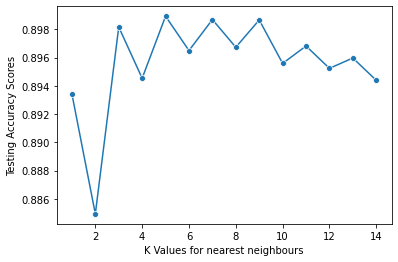

In [55]:
sns.lineplot(x = k_values, y = test_accuracy_scores, marker = 'o')
plt.xlabel("K Values for nearest neighbours")
plt.ylabel("Testing Accuracy Scores")


Text(0, 0.5, 'Training Accuracy Scores')

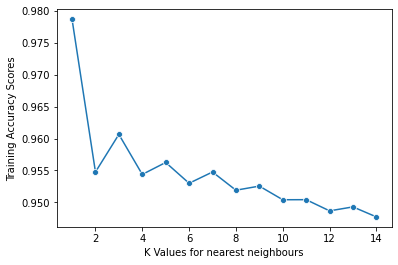

In [56]:
sns.lineplot(x = k_values, y = train_accuracy_scores, marker = 'o')
plt.xlabel("K Values for nearest neighbours")
plt.ylabel("Training Accuracy Scores")


In [51]:
test_accuracy_scores

[0.8982867184067945,
 0.8900863962512812,
 0.9037047884024016,
 0.8990774637575047,
 0.9037926489969248,
 0.901625420998682,
 0.9037633621320837,
 0.9025333138087568,
 0.9041148045101771,
 0.9016839947283642,
 0.9023283057548689,
 0.9000732171621028,
 0.9020647239712989,
 0.9003367989456729]

In [52]:
print("Mean Testing Accuracy: ", np.mean(test_accuracy_scores))
print("Mean Training Accuracy: ", np.mean(test_accuracy_scores))
print("Mean f1: ", np.mean(test_f1_scores))
print("Mean recall: ", np.mean(test_recall_scores))

Mean Testing Accuracy:  0.9009622827019224
Mean Training Accuracy:  0.9009622827019224
Mean f1:  nan
Mean recall:  nan


/Users/sauravdas221/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sauravdas221/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
